In [76]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [77]:
df  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )
df_test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')

In [78]:
df=df.drop(['Unnamed: 0'],axis=1)
df.set_index("Loan_ID", inplace = True)

In [79]:
df_test.head()
df_test.set_index("Loan_ID", inplace = True)

# EXPLORING THE DATA

In [80]:
df.head() #checking the first few rows and columns

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [81]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [82]:
df.describe() #summary of the statistics

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [83]:
df.columns #checking all the columns in the d

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [84]:
df.shape #checking the number of rows and columns

(491, 12)

In [85]:
df.isnull().sum()

Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
df_test.isnull().sum()

Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Property_Area        0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, LP002305 to LP002777
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             481 non-null    object 
 1   Married            490 non-null    object 
 2   Dependents         482 non-null    object 
 3   Education          491 non-null    object 
 4   Self_Employed      462 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         475 non-null    float64
 8   Loan_Amount_Term   478 non-null    float64
 9   Credit_History     448 non-null    float64
 10  Property_Area      491 non-null    object 
 11  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 49.9+ KB


# FILLING MISSING AND NAN VALUES

In [88]:
df["LoanAmount"].fillna((df["LoanAmount"].median()), inplace=True)

In [89]:
df["Loan_Amount_Term"].fillna((df["Loan_Amount_Term"].median()), inplace=True)

In [90]:
df["Credit_History"].fillna((df["Credit_History"].median()), inplace=True)

In [91]:
df["Married"].fillna((df["Married"].mode()[0]), inplace=True)

In [92]:
df["Gender"].fillna((df["Gender"].mode()[0]), inplace=True)

In [93]:
df["Self_Employed"].fillna((df["Self_Employed"].mode()[0]), inplace=True)

In [94]:
df["Dependents"].fillna((df["Dependents"].mode()[0]), inplace=True)

In [95]:
df_test["Gender"].fillna((df_test["Gender"].mode()[0]), inplace=True)

In [96]:
df_test["Self_Employed"].fillna((df_test["Self_Employed"].mode()[0]), inplace=True)

In [97]:
df_test["Dependents"].fillna((df_test["Dependents"].mode()[0]), inplace=True)

In [98]:
df_test["LoanAmount"].fillna((df_test["LoanAmount"].median()), inplace=True)

In [99]:
df_test["Loan_Amount_Term"].fillna((df_test["Loan_Amount_Term"].median()), inplace=True)

In [100]:
df_test["Credit_History"].fillna((df_test["Credit_History"].median()), inplace=True)

In [101]:
df_test["Married"].fillna((df_test["Married"].mode()[0]), inplace=True)

In [102]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [103]:
df_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [104]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,5401.189409,1589.730998,144.395112,341.792261,0.861507,0.698574
std,6419.427177,2919.320624,84.956932,66.138118,0.345769,0.459345
min,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,5705.500000,2251.500000,160.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [105]:
df.shape

(491, 12)

# DATA VISUALIZATION

In [106]:
df["Gender"].value_counts()

Male      403
Female     88
Name: Gender, dtype: int64

In [107]:
df["Dependents"].value_counts()

0     285
1      85
2      78
3+     43
Name: Dependents, dtype: int64

In [108]:
df["Married"].value_counts()

Yes    325
No     166
Name: Married, dtype: int64

In [109]:
df["Education"].value_counts()

Graduate        388
Not Graduate    103
Name: Education, dtype: int64

In [110]:
df["Self_Employed"].value_counts()

No     427
Yes     64
Name: Self_Employed, dtype: int64

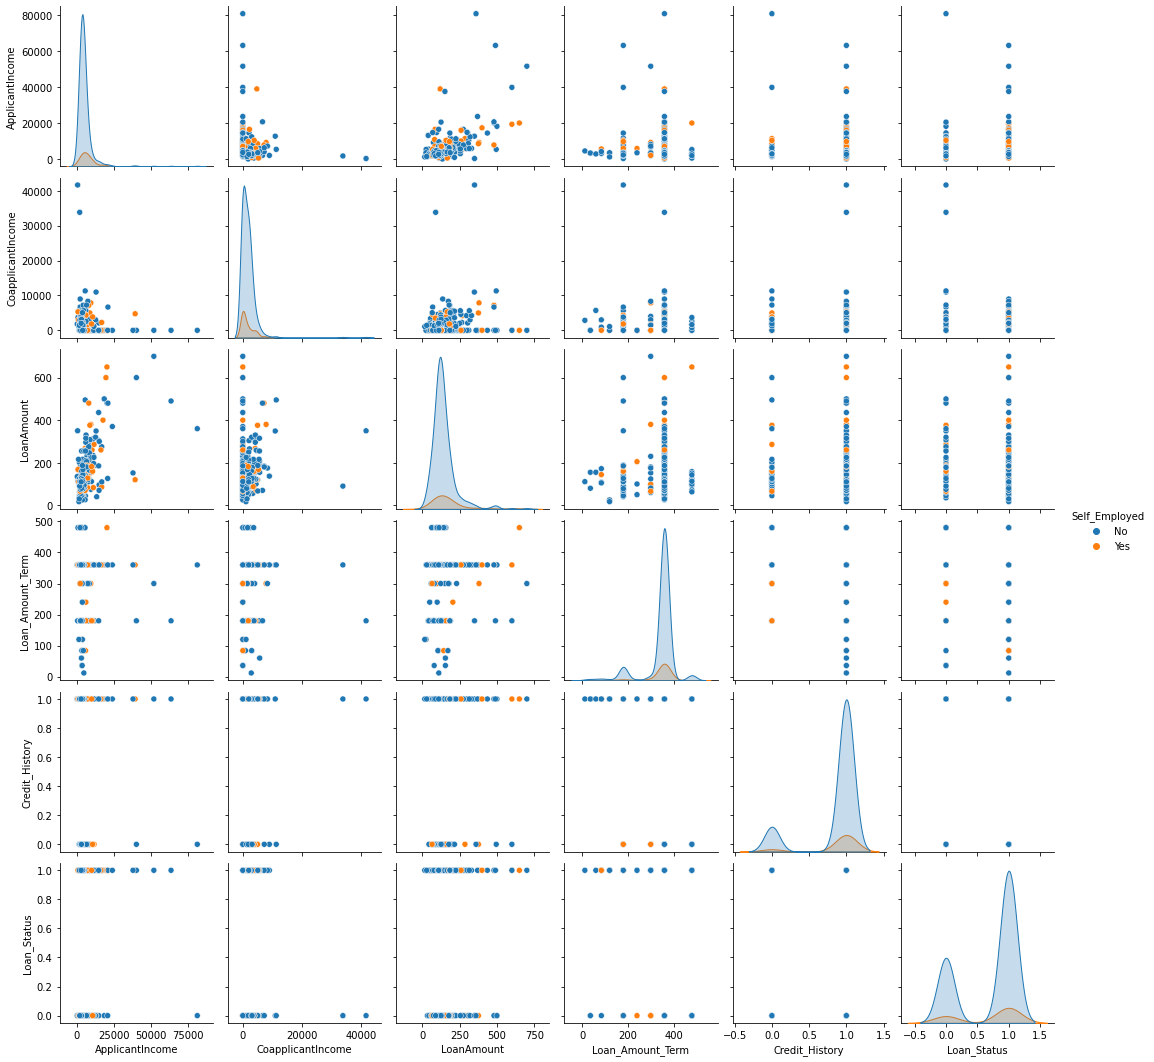

In [111]:
sns.pairplot(df, hue="Self_Employed")

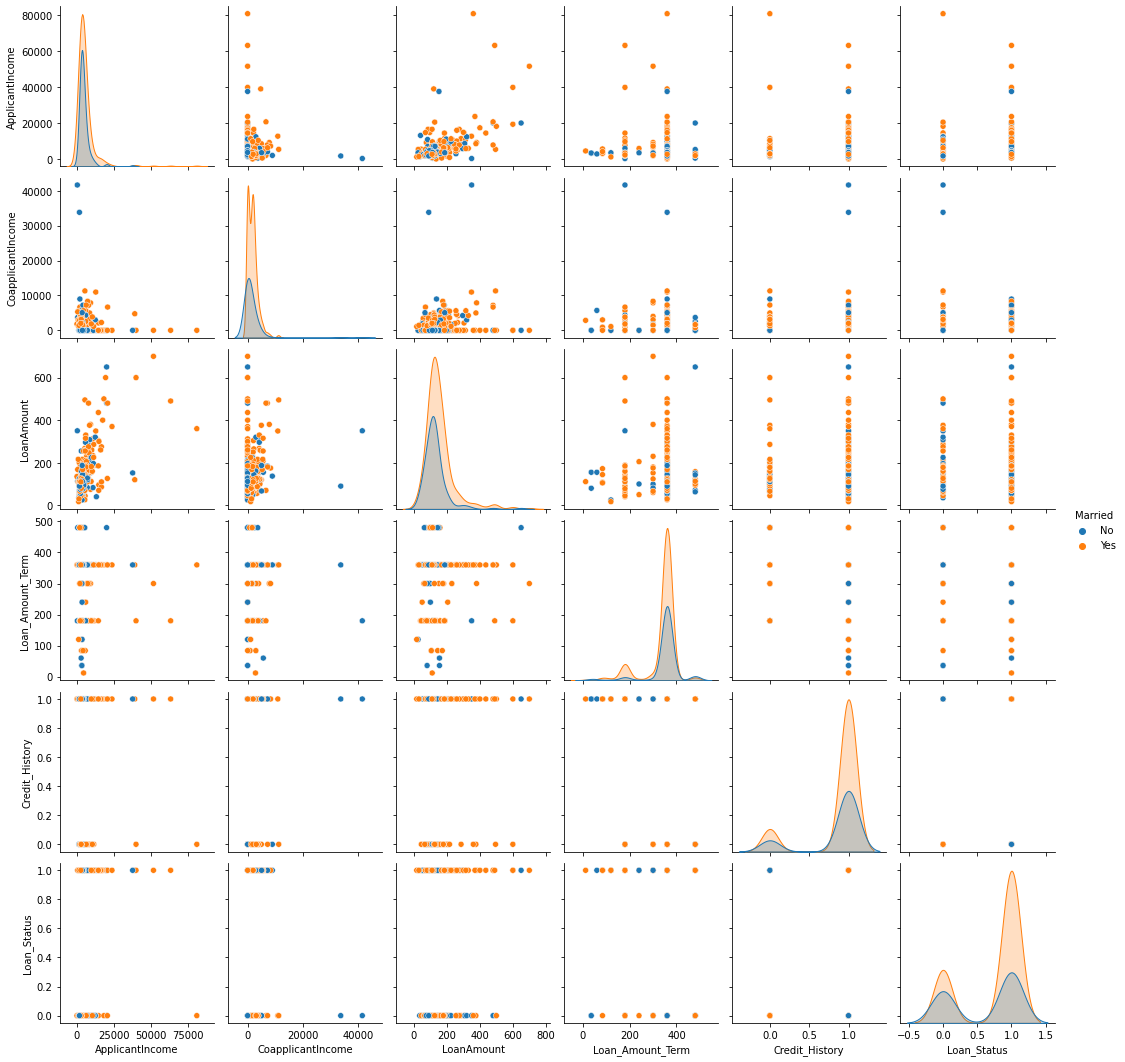

In [112]:
sns.pairplot(df, hue="Married")

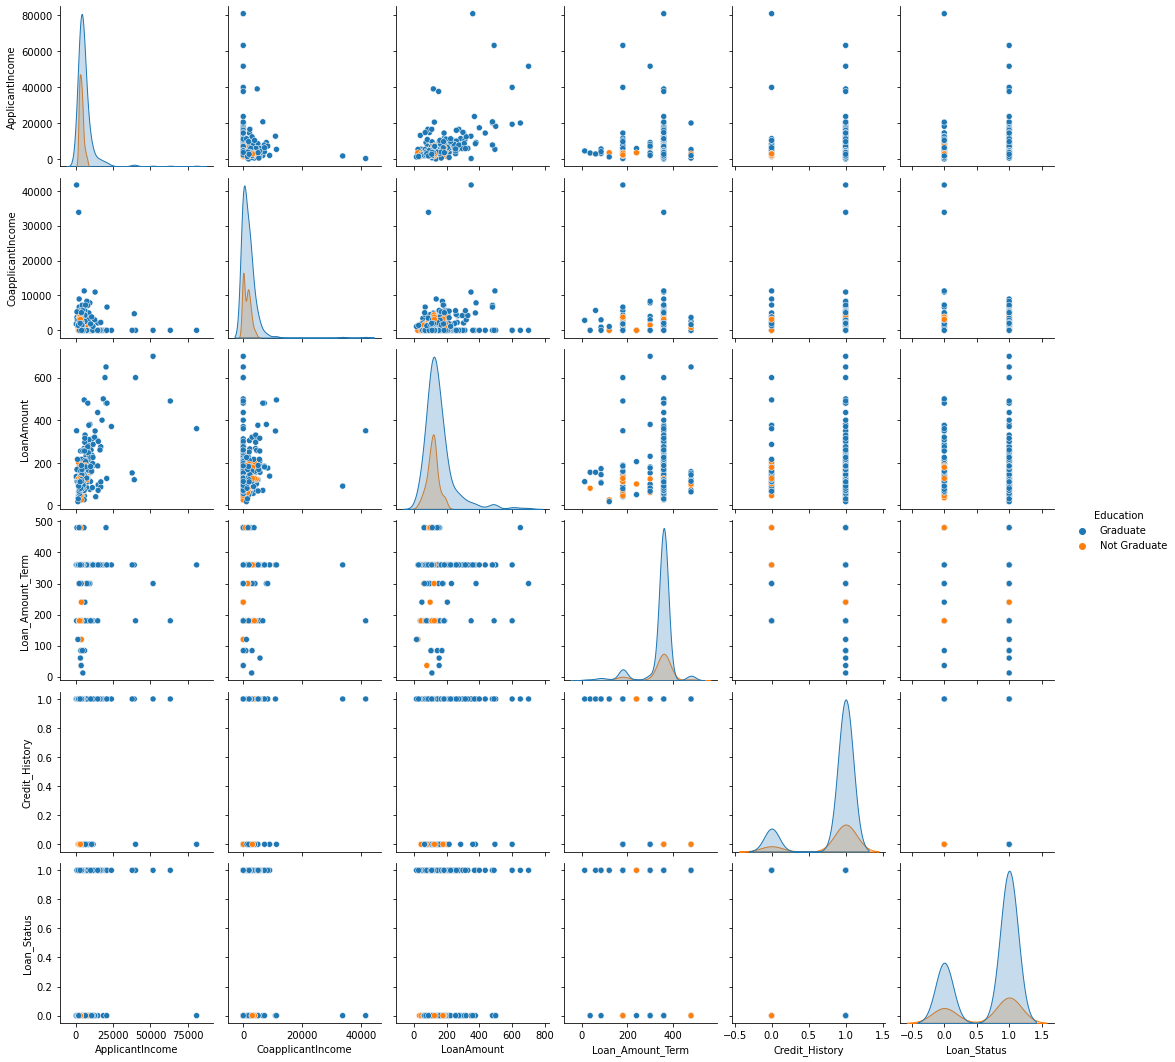

In [113]:
sns.pairplot(df, hue="Education")

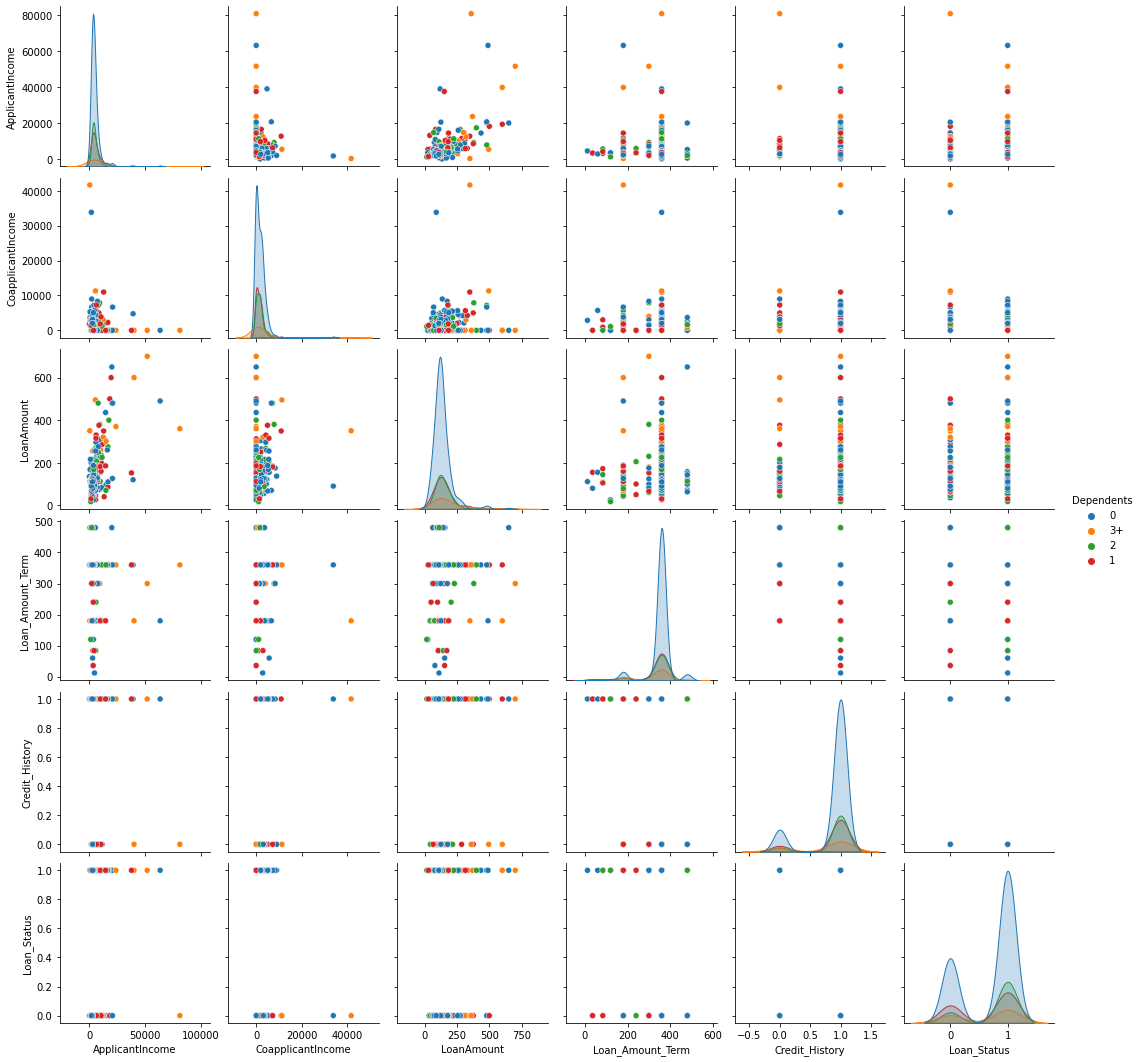

In [114]:
sns.pairplot(df, hue="Dependents")

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

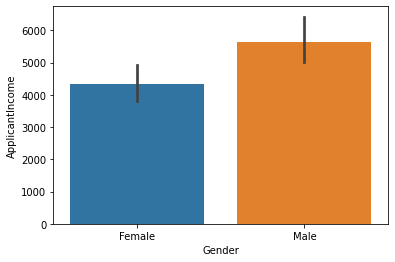

In [115]:
sns.barplot(x="Gender", y="ApplicantIncome", data=df)

# FEATURE ENGINEERING

In [116]:
df = df.drop(["Dependents"], axis=1) #dropping a column

In [117]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,
LP002305,Female,No,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
LP001715,Male,Yes,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
LP002086,Female,Yes,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
LP001136,Male,Yes,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1
LP002529,Male,Yes,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [118]:
df_test = df_test.drop("Dependents", axis=1)
df_test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,
LP001116,Male,No,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
LP001488,Male,Yes,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
LP002138,Male,Yes,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
LP002284,Male,No,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
LP002328,Male,Yes,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [119]:
#converting categorical data into vectors that machine can deal with
cleanup_num = {
              "Gender":  {"Male": 1, "Female": 0},
              "Married": {"Yes": 1, "No": 0}, "Self_Employed": {"Yes": 1, "No": 0},
              "Education": {"Graduate": 0, "Not Graduate": 1} }

In [120]:
df.replace(cleanup_num, inplace=True)
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,
LP002305,0,0,0,0,4547,0.0,115.0,360.0,1.0,Semiurban,1
LP001715,1,1,1,1,5703,0.0,130.0,360.0,1.0,Rural,1
LP002086,0,1,0,0,4333,2451.0,110.0,360.0,1.0,Urban,0
LP001136,1,1,1,1,4695,0.0,96.0,360.0,1.0,Urban,1
LP002529,1,1,0,0,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [121]:
df['Property_Area'].replace({'Urban':2,'Semiurban':1,'Rural':0},inplace=True)
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,
LP002305,0,0,0,0,4547,0.0,115.0,360.0,1.0,1,1
LP001715,1,1,1,1,5703,0.0,130.0,360.0,1.0,0,1
LP002086,0,1,0,0,4333,2451.0,110.0,360.0,1.0,2,0
LP001136,1,1,1,1,4695,0.0,96.0,360.0,1.0,2,1
LP002529,1,1,0,0,6700,1750.0,230.0,300.0,1.0,1,1


In [122]:
cleanup_num1 = {"Dependents":   {"O": 0, "1": 1, "2": 2, "3+": 3},
              "Gender":  {"Male": 1, "Female": 0},"Married": {"Yes": 1, "No": 0}, 
              "Self_Employed": {"Yes": 1, "No": 0},
              "Education": {"Graduate": 0, "Not Graduate": 1} }

In [123]:
df_test.replace(cleanup_num, inplace=True)
df_test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,
LP001116,1,0,1,0,3748,1668.0,110.0,360.0,1.0,Semiurban
LP001488,1,1,0,0,4000,7750.0,290.0,360.0,1.0,Semiurban
LP002138,1,1,0,0,2625,6250.0,187.0,360.0,1.0,Rural
LP002284,1,0,1,0,3902,1666.0,109.0,360.0,1.0,Rural
LP002328,1,1,1,0,6096,0.0,218.0,360.0,0.0,Rural


In [124]:
df_test['Property_Area'].replace({'Urban':2,'Semiurban':1,'Rural':0},inplace=True)
df_test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,
LP001116,1,0,1,0,3748,1668.0,110.0,360.0,1.0,1
LP001488,1,1,0,0,4000,7750.0,290.0,360.0,1.0,1
LP002138,1,1,0,0,2625,6250.0,187.0,360.0,1.0,0
LP002284,1,0,1,0,3902,1666.0,109.0,360.0,1.0,0
LP002328,1,1,1,0,6096,0.0,218.0,360.0,0.0,0


In [125]:
train_data = df.drop('Loan_Status', axis=1)
target = df['Loan_Status']

train_data.shape, target.shape

((491, 10), (491,))

# MODELLING

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report 
from sklearn.model_selection import train_test_split

In [127]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=1)

In [128]:
model=LogisticRegression()
scoring = "accuracy"

In [129]:
score = cross_val_score(model, train_data, target, cv=k_fold, n_jobs=1, scoring = scoring)

C:\Users\vr00574274\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\vr00574274\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

In [130]:
print(score)

[0.72       0.79591837 0.85714286 0.73469388 0.81632653 0.87755102
 0.81632653 0.75510204 0.93877551 0.79591837]


In [131]:
round(np.mean(score)*100, 2)

81.08

In [132]:
clf = DecisionTreeClassifier()

In [133]:
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7        0.69387755 0.63265306 0.6122449  0.71428571 0.7755102
 0.71428571 0.65306122 0.71428571 0.65306122]


In [134]:
round(np.mean(score)*100, 2)

68.63

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
R_clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(R_clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.68       0.81632653 0.81632653 0.69387755 0.87755102 0.85714286
 0.81632653 0.71428571 0.91836735 0.75510204]


In [137]:
round(np.mean(score)*100, 2)

79.45

In [138]:
model.fit(train_data, target)

#test_data = test.drop("Loan_ID", axis=1).copy()
prediction = model.predict(df_test)

C:\Users\vr00574274\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [139]:
pickle.dump(model, open('model.pkl','wb'))

In [140]:
pred_cols = pd.DataFrame({
        "Loan_Status": prediction
    })

In [142]:
pred_cols.rename(columns={'Loan_Status':'prediction'}, inplace=True)
pred_cols.to_csv('predictions_loan_subm.csv', index=False)